# Customer Shopping Data Analysis

---------------------------------------------------------------

**Resources**

- Blog Link : *https://fabianwerkmeister.notion.site/Shopping-Data-64bf50dc0d24409c915853b17a3f7f54*
- DataSet Link : *https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset*
- Github Link : *https://github.com/SaibalPatraDS/Shopping-Data-Analysis*

In [158]:
## importing libraries and packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
import warnings
warnings.filterwarnings("ignore")

In [160]:
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 20)

In [161]:
## loading the data

shopping_data = pd.read_csv("dataset/customer_shopping_data.csv")
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [162]:
## basic processing

shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [163]:
## changing dtype of one of the column

shopping_data['invoice_date'] = pd.to_datetime(shopping_data['invoice_date'], format = '%d/%m/%Y')

In [164]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [165]:
shopping_data.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,2022-10-15,Mall of Istanbul


In [166]:
## creating month and year columns from existing data

shopping_data['month'] = shopping_data['invoice_date'].dt.month
shopping_data['year'] = shopping_data['invoice_date'].dt.year

In [167]:
## checking data

shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


In [168]:
## unique dates

shopping_data['invoice_date'].nunique()

797

In [169]:
## unique category in dataset

shopping_data['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [170]:
## total buys from each malls

shopping_data[['shopping_mall', 'category']].value_counts().reset_index().sort_values(['shopping_mall', 'category'])

,shopping_mall,category,count
68,Cevahir AVM,Books,258
17,Cevahir AVM,Clothing,1729
46,Cevahir AVM,Cosmetics,732
37,Cevahir AVM,Food & Beverage,772
58,Cevahir AVM,Shoes,490
76,Cevahir AVM,Souvenir,240
70,Cevahir AVM,Technology,256
54,Cevahir AVM,Toys,514
77,Emaar Square Mall,Books,236
19,Emaar Square Mall,Clothing,1651


In [171]:
## creating a new column, 'datetype', that will give me info whether a day is weekday or weekend

'''
[helps to recommend product to customers on weekday and weekend shopping]
'''

def week_day_or_week_end(data):
    result = data.weekday()
    if result < 5 :
        return 'weekday'
    else:
        return "weekend"

shopping_data['datetype'] = shopping_data['invoice_date'].apply(week_day_or_week_end)

In [172]:
## checking final result 

shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,datetype
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022,weekday
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021,weekend
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021,weekday
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021,weekend
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021,weekend


In [173]:
## creating new column, age + gender for better recommendation

shopping_data['age_gen'] = (shopping_data['age'].astype('str') + "_" + shopping_data['gender'])
shopping_data['age_gen']

0        28_Female
1          21_Male
2          20_Male
3        66_Female
4        53_Female
           ...    
99452    45_Female
99453      27_Male
99454      63_Male
99455      56_Male
99456    36_Female
Name: age_gen, Length: 99457, dtype: object

## 1. Data Analytics Track 

----------------------------------------

### 1.1 Sales Analytics

------------------------------------------------------------

#### 1.1.1 sales per month and year per product

-------------------------------------------

In [174]:
## sales per month and year per product

shopping_data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall', 'month',
       'year', 'datetype', 'age_gen'],
      dtype='object')

In [175]:
## calculating results using groupby 

sales_per_month = shopping_data.groupby(['month', 'category'])['quantity'].sum().reset_index().rename(columns = {'quantity' : 'total_sales'})
sales_per_month

,month,category,total_sales
0,1,Books,1780
1,1,Clothing,11838
2,1,Cosmetics,5441
3,1,Food & Beverage,4990
4,1,Shoes,3519
5,1,Souvenir,1856
6,1,Technology,1756
7,1,Toys,3583
8,2,Books,1625
9,2,Clothing,10985


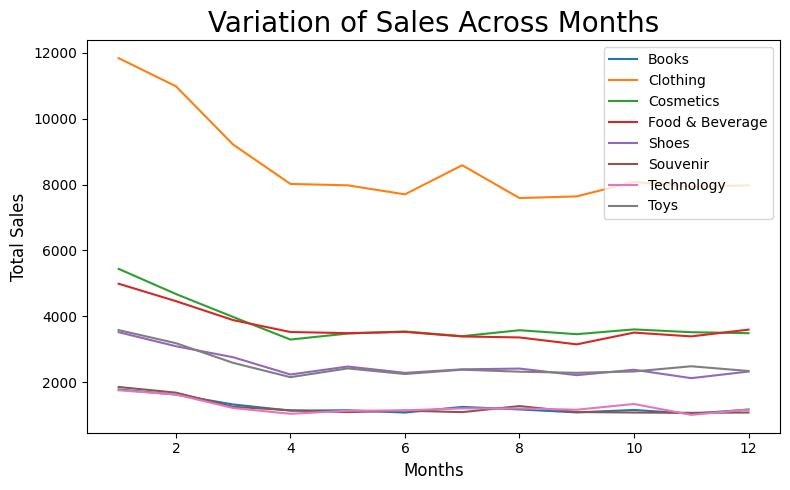

In [176]:
## visualizing the data for better trend understanding

sales_per_month_grouped = sales_per_month.groupby('category')  ## groupby data to hover through the data

## setting figure axis
plt.figure(figsize = (8,5))

for name, group in sales_per_month_grouped:
    plt.plot(group['month'], group['total_sales'], label = name)
    
## adding labels and title for better understanding
plt.title("Variation of Sales Across Months", size = 20)
plt.xlabel("Months", size = 12)
plt.ylabel("Total Sales", size = 12)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [177]:
## sales per year on each product

sales_per_year = shopping_data.groupby(['year', 'category'])['quantity'].sum()
sales_per_year.reset_index()

,year,category,quantity
0,2021,Books,6605
1,2021,Clothing,47871
2,2021,Cosmetics,20366
3,2021,Food & Beverage,20302
4,2021,Shoes,13733
5,2021,Souvenir,6745
6,2021,Technology,6766
7,2021,Toys,13708
8,2022,Books,7051
9,2022,Clothing,46889


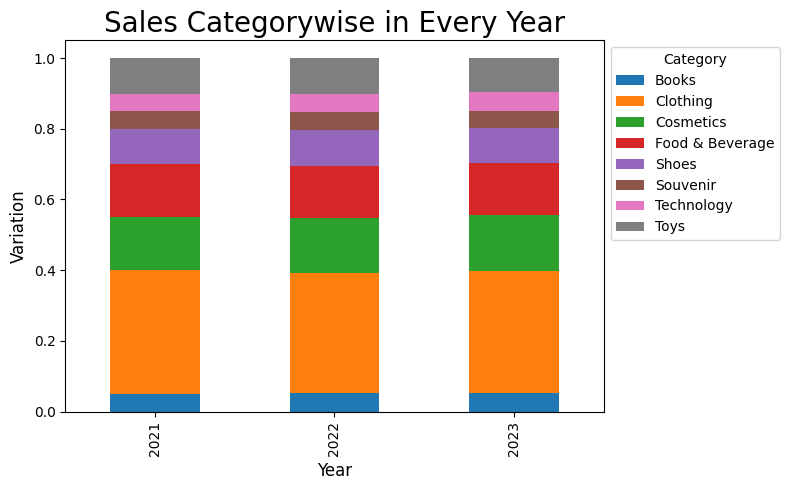

In [178]:
## Visualize the whole data, yearwise for better understanding of sales

sales_per_year_unstacked = sales_per_year.unstack()
sales_per_year_norm = sales_per_year_unstacked.div(sales_per_year_unstacked.sum(axis = 1), axis = 0)
# sales_per_year_norm


## visualizing the data
sales_per_year_norm.plot(kind = 'bar',
                         stacked = True,
                         figsize = (8,5))

plt.title("Sales Categorywise in Every Year", size = 20)
plt.xlabel("Year", size = 12)
plt.ylabel("Variation", size = 12)

# legend
plt.legend(title = 'Category', bbox_to_anchor=(1, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

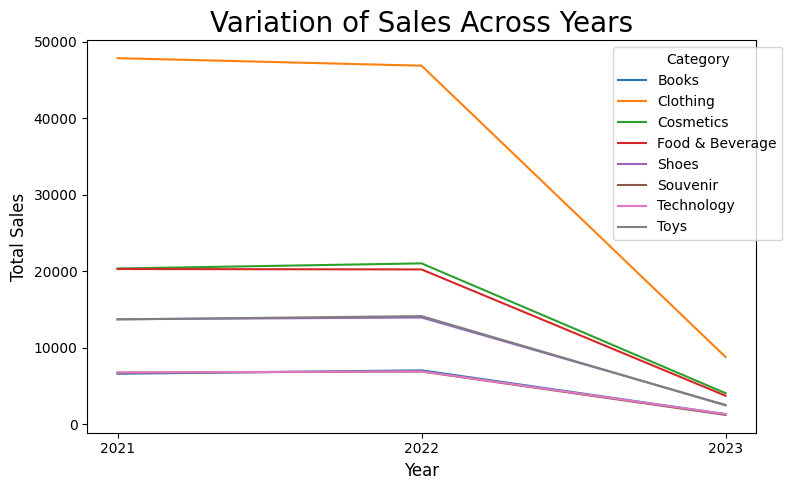

In [179]:
## visualizing the data for better trend understanding

sales_per_year_grouped = sales_per_year.reset_index().groupby('category')  ## groupby data to hover through the data

# Create a figure and axis
plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

for name, group in sales_per_year_grouped:
    plt.plot(group['year'], group['quantity'], label = name)
    
## adding labels and title for better understanding
plt.title("Variation of Sales Across Years", size = 20)
plt.xlabel("Year", size = 12)
plt.ylabel("Total Sales", size = 12)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.05, 1), title = 'Category')

# Set the x-axis ticks to integer values
years = range(int(min(sales_per_year.reset_index()['year'])), int(max(sales_per_year.reset_index()['year'])) + 1)
ax.set_xticks(years)

plt.tight_layout()
plt.show()

#### 1.1.2 sales per month and year per mall

-------------------------------------------

In [180]:
## basic understanding about the mall info

shopping_data['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [181]:
## calculating total sales per month per mall

sales_per_month_mall = shopping_data.groupby(['shopping_mall', 'month'])['quantity'].sum().reset_index().rename(columns = {'quantity' : 'total_sales'})
sales_per_month_mall

,shopping_mall,month,total_sales
0,Cevahir AVM,1,1750
1,Cevahir AVM,2,1425
2,Cevahir AVM,3,1344
3,Cevahir AVM,4,1124
4,Cevahir AVM,5,1218
5,Cevahir AVM,6,1135
6,Cevahir AVM,7,1241
7,Cevahir AVM,8,1117
8,Cevahir AVM,9,1103
9,Cevahir AVM,10,1179


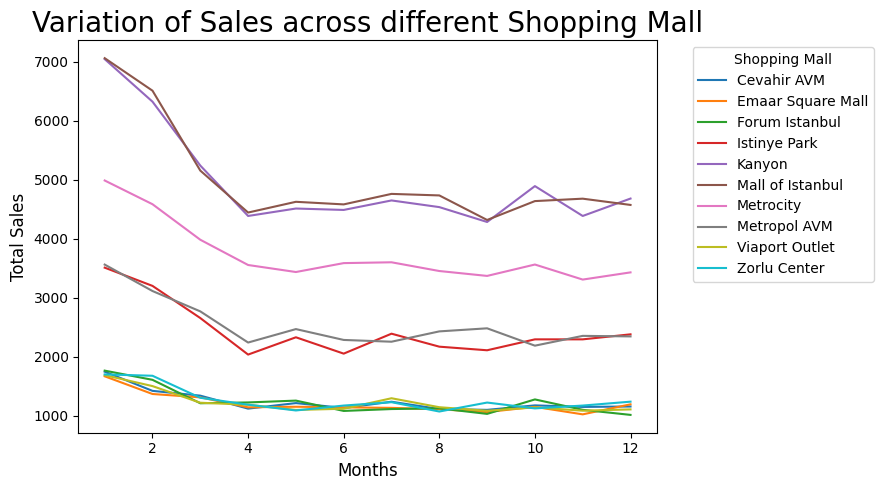

In [182]:
## plotting the data for better understanding

# grouping data on mall, to get a grouping object
sales_per_month_mall_grouped = sales_per_month_mall.groupby('shopping_mall')

plt.figure(figsize = (9,5))

# plotting the results
for name, group in sales_per_month_mall_grouped:
    plt.plot(group['month'], group['total_sales'], label = name)
    
## setting the plotting frame
plt.title("Variation of Sales across different Shopping Mall", size = 20)
plt.xlabel("Months", size = 12)
plt.ylabel("Total Sales", size = 12)
plt.legend(loc = 'upper left', title = 'Shopping Mall', bbox_to_anchor = (1.05, 1))
plt.tight_layout()
plt.show()

In [183]:
## 

In [184]:
## calculating total sales per month per mall

sales_per_year_mall = shopping_data.groupby(['shopping_mall', 'year'])['quantity'].sum().reset_index().rename(columns = {'quantity' : 'total_sales'})
sales_per_year_mall

,shopping_mall,year,total_sales
0,Cevahir AVM,2021,7079
1,Cevahir AVM,2022,6707
2,Cevahir AVM,2023,1163
3,Emaar Square Mall,2021,6701
4,Emaar Square Mall,2022,6546
5,Emaar Square Mall,2023,1254
6,Forum Istanbul,2021,6670
7,Forum Istanbul,2022,6946
8,Forum Istanbul,2023,1236
9,Istinye Park,2021,13277


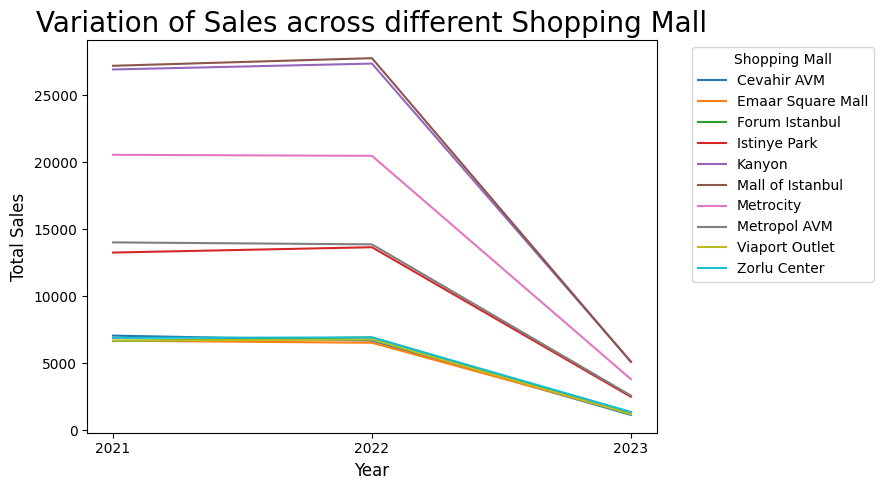

In [185]:
## plotting the data for better understanding

# grouping data on mall, to get a grouping object
sales_per_year_mall_grouped = sales_per_year_mall.groupby('shopping_mall')

plt.figure(figsize = (9,5))
ax = plt.subplot(111)

# plotting the results
for name, group in sales_per_year_mall_grouped:
    plt.plot(group['year'], group['total_sales'], label = name)
    
## setting the plotting frame
plt.title("Variation of Sales across different Shopping Mall", size = 20)
plt.xlabel("Year", size = 12)
plt.ylabel("Total Sales", size = 12)
plt.legend(loc = 'upper left', title = 'Shopping Mall', bbox_to_anchor = (1.05, 1))

## setting the x axis labels
years = range(int(shopping_data['year'].min()), int(shopping_data['year'].max()) + 1)
ax.set_xticks(years)

plt.tight_layout()
plt.show()

#### 1.1.3 Frequency of payment methods across age and gender

--------------------------------------------------------------------

In [186]:
shopping_data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall', 'month',
       'year', 'datetype', 'age_gen'],
      dtype='object')

In [187]:
## calculating total payements done in each payment methods across different ages

paymnts_age_gender_cnt = shopping_data.groupby(['age', 'gender', 'payment_method'])['customer_id'].count().reset_index().rename(columns = 
                                                                                                                 {'customer_id' : 'total_payment'})
paymnts_age_gender_cnt

,age,gender,payment_method,total_payment
0,18,Female,Cash,473
1,18,Female,Credit Card,383
2,18,Female,Debit Card,223
3,18,Male,Cash,342
4,18,Male,Credit Card,267
...,...,...,...,...
307,69,Female,Credit Card,394
308,69,Female,Debit Card,219
309,69,Male,Cash,325
310,69,Male,Credit Card,290


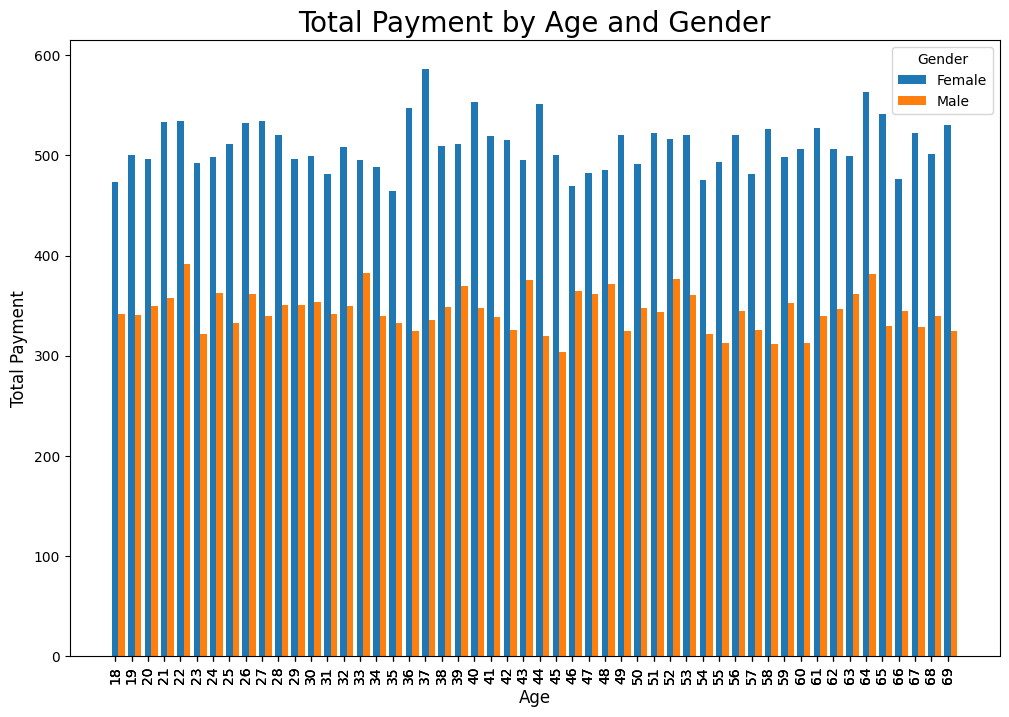

In [188]:
## plotting the results for better results

# female and male data seperated
female_df = paymnts_age_gender_cnt[paymnts_age_gender_cnt['gender'] == 'Female']
male_df = paymnts_age_gender_cnt[paymnts_age_gender_cnt['gender'] == 'Male']

# create seperate bar chart for each gender
fig, ax = plt.subplots(figsize = (12,8))

## creating bar charts for each male and female df
ax.bar(female_df['age'], female_df['total_payment'], width = 0.4, label = 'Female', align = 'center')

ax.bar(male_df['age'] + 0.4, male_df['total_payment'], width = 0.4, label = 'Male', align = 'center')

## set x-axis labels
ax.set_xticks(female_df['age'])
ax.set_xticklabels(female_df['age'])
plt.xticks(rotation = 90)

## set title and labels
ax.set_title("Total Payment by Age and Gender", size = 20)
ax.set_xlabel("Age", size = 12)
ax.set_ylabel("Total Payment", size = 12)

## add a legend
ax.legend(title = 'Gender')

# plot the result
plt.show()

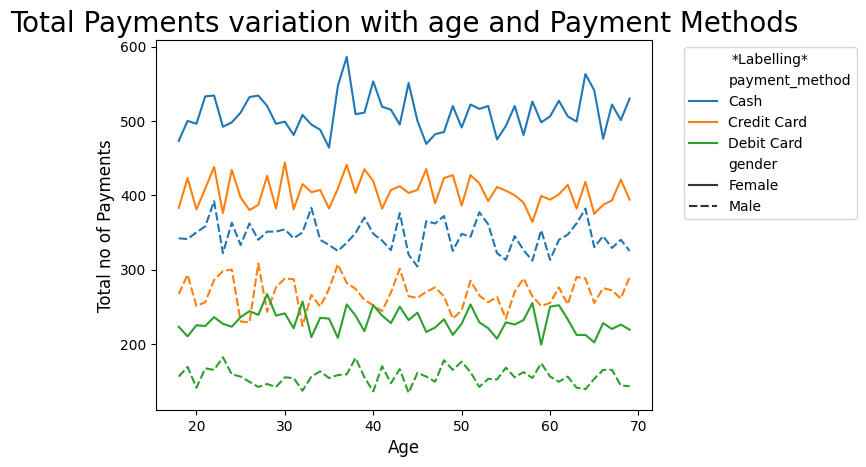

In [189]:
## plotting a scatter plot to observe if there is any trend in payment method acceptance with age and gender

# sns.scatterplot(x = female_df['age'], y = female_df['total_payment'], 
#                 hue = female_df['payment_method'], 
#                 data = female_df)
# sns.scatterplot(x = male_df['age'], y = male_df['total_payment'], 
#                 hue = male_df['payment_method'], 
#                 data = male_df)

sns.lineplot(x = 'age', y = 'total_payment', hue = 'payment_method', style = 'gender', data = paymnts_age_gender_cnt)

## setting title and labels
plt.title("Total Payments variation with age and Payment Methods", size = 20)
plt.xlabel("Age", size = 12)
plt.ylabel("Total no of Payments", size = 12)

plt.legend(title = '*Labelling*', bbox_to_anchor = (1.05, 1))
plt.show()

#### 1.1.4 Market Basket Analysis

---------------------------------------------------------

**Trying to find association between different product categories in customer purchases**

In [190]:
## creating a list containing all categories of products

product_list = []

for i in range(shopping_data.shape[0]):
    product_list.append([str(shopping_data.loc[i, 'category'])])

In [191]:
## checking final list of products

product_list[:10]

[['Clothing'],
 ['Shoes'],
 ['Clothing'],
 ['Shoes'],
 ['Books'],
 ['Clothing'],
 ['Cosmetics'],
 ['Clothing'],
 ['Clothing'],
 ['Clothing']]

In [192]:
## applying association rule mining

from apyori import apriori

rules = apriori(product_list)
results = list(rules)
results

[RelationRecord(items=frozenset({'Clothing'}), support=0.34675286807363986, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Clothing'}), confidence=0.34675286807363986, lift=1.0)]),
 RelationRecord(items=frozenset({'Cosmetics'}), support=0.15179424273806771, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cosmetics'}), confidence=0.15179424273806771, lift=1.0)]),
 RelationRecord(items=frozenset({'Food & Beverage'}), support=0.14856671727480217, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Food & Beverage'}), confidence=0.14856671727480217, lift=1.0)]),
 RelationRecord(items=frozenset({'Shoes'}), support=0.10088782086730949, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Shoes'}), confidence=0.10088782086730949, lift=1.0)]),
 RelationRecord(items=frozenset({'Toys'}), support=0.10142071447962436, ordered_statistics=[OrderedStatistic(items_base=fr

In [193]:
shopping_data.shape

(99457, 14)

In [194]:
shopping_data['category'].nunique()

8

In [195]:
## creating association rules for every individual shopping mallls to recommend what people refers most to buy from that store

shopping_malls = shopping_data['shopping_mall'].unique()
shopping_malls

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [196]:
## creating a list of objects bought from every shopping mall

items_bought = []

for mall in shopping_malls:
    items_bought.append(shopping_data[shopping_data['shopping_mall'] == mall]['category'].tolist())

In [197]:
print(len(items_bought))

10


In [198]:
# items_bought = []

# for mall in shopping_malls:
#     categories = shopping_data[shopping_data['shopping_mall'] == mall]['category'].tolist()
#     items_bought.append(categories)
# items_bought

In [199]:
## creating association rule using apriori algo

from apyori import apriori

rules = apriori(items_bought, min_support = 0.5, min_confidence = 0.5, min_lift = 1)
results = list(rules)
results[:10]

[RelationRecord(items=frozenset({'Books'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Books'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Clothing'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Clothing'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Cosmetics'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cosmetics'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Food & Beverage'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Food & Beverage'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Shoes'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Shoes'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Souvenir'}), support=1.0, ordered_sta

In [200]:
## creating association rules for every individual shopping dates to recommend what people refers most to buy from that store

shopping_months = shopping_data['month'].unique()
shopping_months

array([ 8, 12, 11,  5, 10,  3,  1,  7,  6,  2,  4,  9])

In [201]:
## creating a list of all objects that were bought in weekdays and weekends

items = []

for month in shopping_months:
    items.append(shopping_data[shopping_data['month'] == month]['category'].tolist())

In [202]:
## checking the results

# items
len(items)

12

In [203]:
# items

In [204]:
## defining association rules based on weekends and weekdays

from apyori import apriori

rules = apriori(items)
results = list(rules)
# results

In [205]:
## creating association rule mining on basis of age and gender

different_ages = shopping_data['age'].unique()
different_ages

array([28, 21, 20, 66, 53, 49, 32, 69, 60, 36, 29, 67, 25, 24, 65, 42, 46,
       23, 27, 52, 44, 51, 50, 68, 43, 59, 54, 48, 40, 41, 19, 18, 22, 61,
       45, 64, 33, 63, 34, 47, 38, 57, 30, 26, 62, 39, 55, 56, 35, 31, 37,
       58], dtype=int64)

In [206]:
## collecting the list of all categories of products bought by each age class people

item_list = []

for age in different_ages:
    item_list.append(shopping_data[shopping_data['age'] == age]['category'].tolist())
    
## checking the list of all objects
len(item_list)

52

In [208]:
## defining association rules

from apyori import apriori

rules = apriori(item_list, min_lift = 1.0, max_lenght = 2, min_length = 2, min_support = 0.5, min_confidence = 0.50)
results = list(rules)
# results

In [209]:
## creating association rule mining on basis of age and gender

dif_age_gen = shopping_data['age_gen'].unique()
dif_age_gen

array(['28_Female', '21_Male', '20_Male', '66_Female', '53_Female',
       '49_Female', '32_Female', '69_Male', '60_Female', '36_Female',
       '29_Female', '67_Female', '25_Male', '24_Male', '65_Male',
       '42_Female', '46_Female', '23_Male', '27_Female', '52_Male',
       '44_Male', '51_Male', '25_Female', '50_Male', '65_Female',
       '29_Male', '68_Male', '43_Male', '59_Female', '54_Male', '67_Male',
       '48_Female', '40_Female', '41_Female', '46_Male', '19_Female',
       '43_Female', '18_Male', '22_Female', '61_Female', '45_Female',
       '64_Male', '33_Female', '66_Male', '22_Male', '63_Female',
       '24_Female', '44_Female', '34_Male', '47_Female', '38_Male',
       '57_Female', '41_Male', '69_Female', '40_Male', '60_Male',
       '30_Male', '53_Male', '52_Female', '26_Male', '30_Female',
       '62_Male', '39_Male', '26_Female', '55_Male', '64_Female',
       '48_Male', '56_Female', '35_Male', '27_Male', '68_Female',
       '50_Female', '21_Female', '31_Female', '51

In [211]:
## collecting the list of all categories of products bought by each age class people

items_list = []

for age_gen in dif_age_gen:
    items_list.append(shopping_data[shopping_data['age_gen'] == age_gen]['category'].tolist())
    
## checking the list of all objects
len(items_list)

104

In [217]:
## defining association rules

from apyori import apriori

rules = apriori(items_list, min_lift = 1.0, max_length = 2, min_length = 2, min_support = 0.5, min_confidence = 0.50)
results = list(rules)
# results

- It's difficult to recommend something using `Association Rule Mining`